<a href="https://colab.research.google.com/github/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/ProjetoICD_Maria_ExploracaoInicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Título: "Efeito das diferenças socioeconômicas sobre as notas do Enem na Paraíba"**

## **Objetivo geral:**
Avaliar o perfil socioeconômico dos Estudantes na Paraíba e seus efeitos sobre o desempenho no Exame Nacional de Ensino Médio

###*Objetivos Específicos:*
Avaliar a relação dos fatores abaixo com o desempenho no Enem:
- tipo de escola (privada, particular)
- tipo de dependência admnistrativa (Federal, Estadual, Municipal, Privada)
- cor/raça
- tipo de localização (Rural, Urbana)
- escolaridade dos pais
- tipo de ocupação dos pais
- renda familiar
- numero de pessoas na casa
- acesso a celular, computador e internet

#**EXPLORAÇÕES INICIAIS**


###**Pacotes Utilizados**

In [2]:
# !pip install plotly --upgrade

In [48]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile

import warnings
warnings.filterwarnings('ignore')

###**Banco de Dados Selecionado**

In [51]:
dfEnem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DadosEnem/ENEM_PB_1998_2019.csv',sep=',')
dfEnemESCOLA = pd.read_csv('https://github.com/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')

#**ANÁLISES POR BARPLOTS**

## **Número de Candidatos Por Município**


---



In [52]:
#@title
N_municipio=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
N_municipio.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio['Porcentagem']=N_municipio['NU_INSCRICAO']/N_municipio['NU_INSCRICAO'].sum()*100
N_municipio

,NO_MUNICIPIO_RESIDENCIA,NU_INSCRICAO,Porcentagem
93,JOÃO PESSOA,521227,27.352655
48,CAMPINA GRANDE,289611,15.198042
133,PATOS,60249,3.161713
169,SANTA RITA,49105,2.576904
22,BAYEUX,46347,2.432172
...,...,...,...
188,SÃO DOMINGOS,700,0.036734
131,PARARI,641,0.033638
203,SÃO JOÃO DO TIGRE,596,0.031277
13,AREIA DE BARAÚNAS,525,0.027551


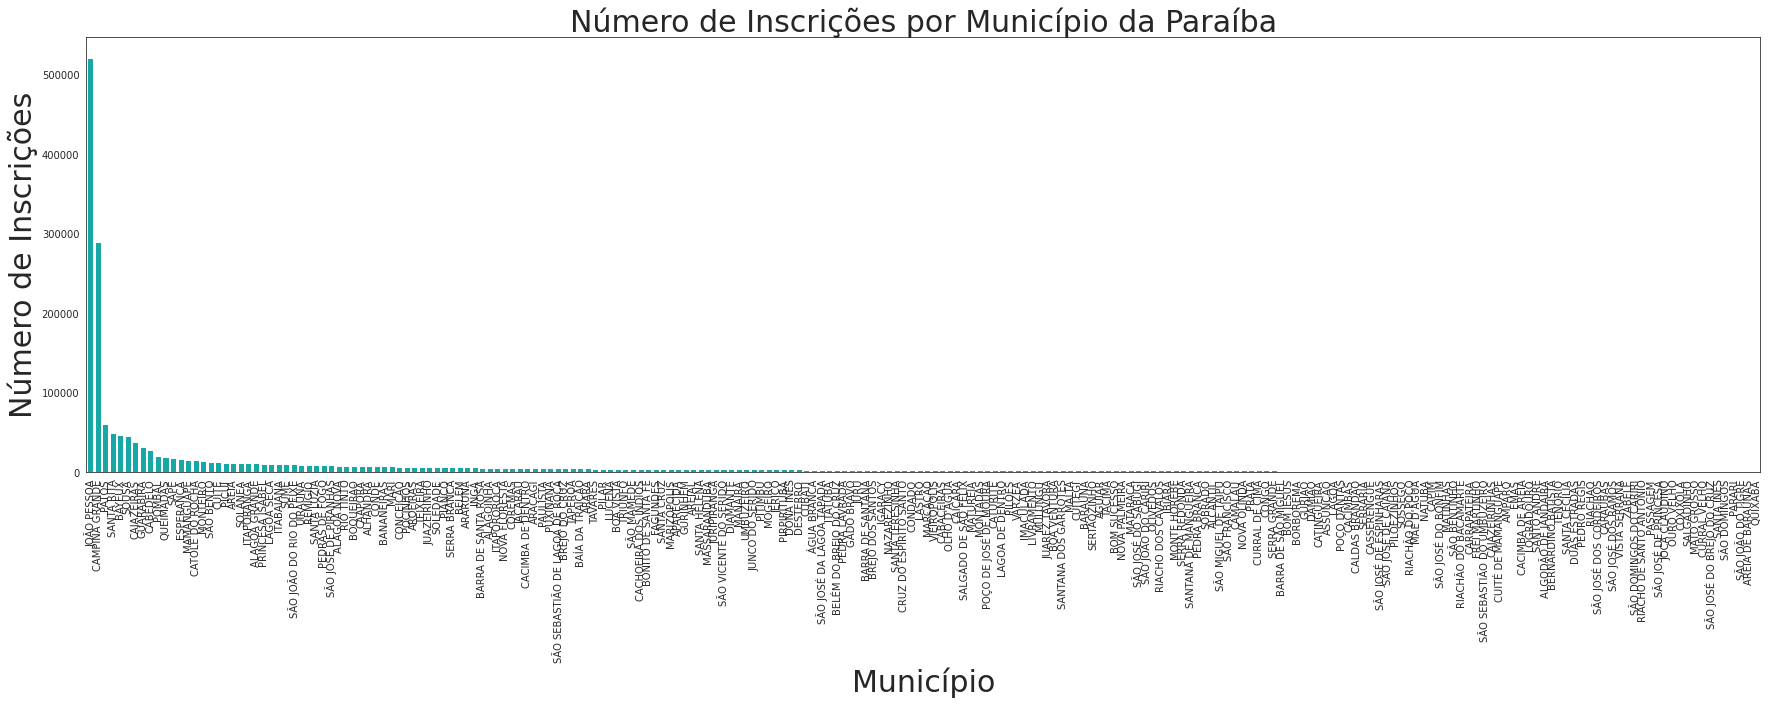

In [54]:
#@title
sns.set_style("white")
plt.subplots(figsize=(30,8))
sns.barplot(x ='NO_MUNICIPIO_RESIDENCIA', y ='NU_INSCRICAO', color="c", data = N_municipio)
plt.xticks(rotation=90)
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30)
plt.ylabel("Número de Inscrições", fontsize=30);


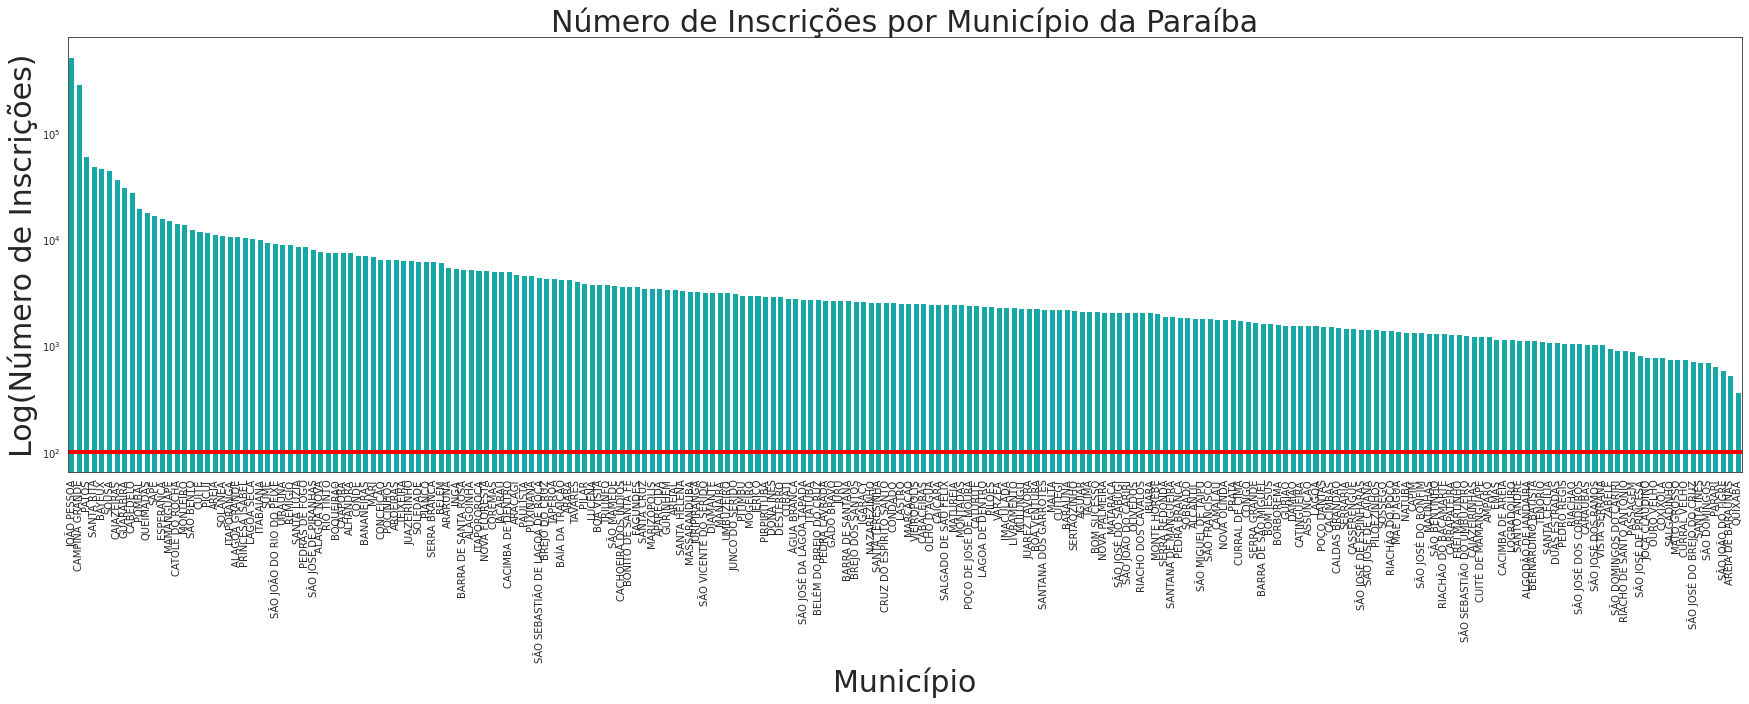

In [55]:
#@title
sns.set_style("white")
plt.subplots(figsize=(30,8))
sns.barplot(x = 'NO_MUNICIPIO_RESIDENCIA', y = 'NU_INSCRICAO', color="c", data = N_municipio)
plt.yscale("log")
plt.xticks(rotation=90)
plt.axhline(y=100, color = 'r', ls = '-', linewidth=4)
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30)
plt.ylabel("Log(Número de Inscrições)", fontsize=30);

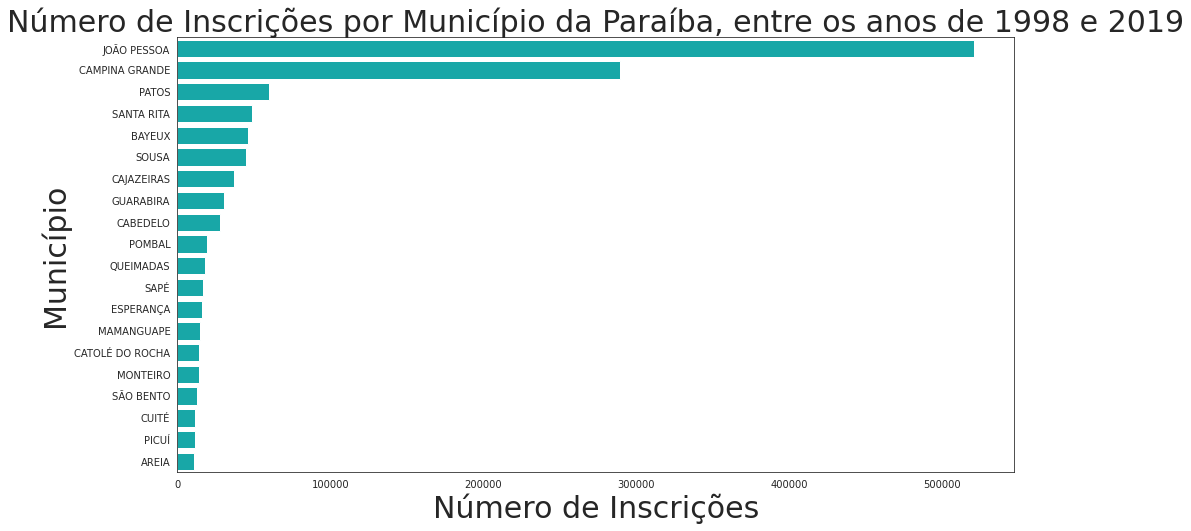

In [56]:
# eu fiz esa visualiação pra tu julgar se fica melhor de ver as mais relevantes

maiores = N_municipio.head(20)
sns.set_style("white")
plt.subplots(figsize=(15,8))
sns.barplot(y ='NO_MUNICIPIO_RESIDENCIA', x ='NU_INSCRICAO', color="c", data = maiores)
plt.title("Número de Inscrições por Município da Paraíba, entre os anos de 1998 e 2019", fontsize=30)
plt.ylabel("Município", fontsize=30)
plt.xlabel("Número de Inscrições", fontsize=30);

In [57]:
N_municipio_ano=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA', 'NU_ANO'], as_index=False)['NU_INSCRICAO'].count()
N_municipio_ano.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio_ano['Porcentagem']=N_municipio_ano['NU_INSCRICAO']/N_municipio_ano['NU_INSCRICAO'].sum()*100
N_municipio_ano.rename(columns = {'NU_INSCRICAO': 'INSCRITOS'}, inplace = True)
N_municipio_ano

,NO_MUNICIPIO_RESIDENCIA,NU_ANO,INSCRITOS,Porcentagem
1612,JOÃO PESSOA,2014,63993,3.358188
1614,JOÃO PESSOA,2016,61127,3.207788
1613,JOÃO PESSOA,2015,56788,2.980088
1611,JOÃO PESSOA,2013,52499,2.755013
1615,JOÃO PESSOA,2017,50138,2.631114
...,...,...,...,...
3666,UIRAÚNA,2004,1,0.000052
302,BANANEIRAS,1998,1,0.000052
2864,SANTA INÊS,2001,1,0.000052
806,CALDAS BRANDÃO,2005,1,0.000052


In [58]:
n = 5
plot_maiores = N_municipio_ano[N_municipio_ano['NO_MUNICIPIO_RESIDENCIA'].isin(N_municipio.head(n).NO_MUNICIPIO_RESIDENCIA.tolist())].sort_values(by='NU_ANO')
plot_maiores

,NO_MUNICIPIO_RESIDENCIA,NU_ANO,INSCRITOS,Porcentagem
2898,SANTA RITA,1998,1,0.000052
836,CAMPINA GRANDE,1998,210,0.011020
387,BAYEUX,1998,3,0.000157
1596,JOÃO PESSOA,1998,69,0.003621
2899,SANTA RITA,1999,3,0.000157
...,...,...,...,...
2295,PATOS,2019,3981,0.208913
1617,JOÃO PESSOA,2019,37219,1.953158
857,CAMPINA GRANDE,2019,21735,1.140597
2918,SANTA RITA,2019,3815,0.200201


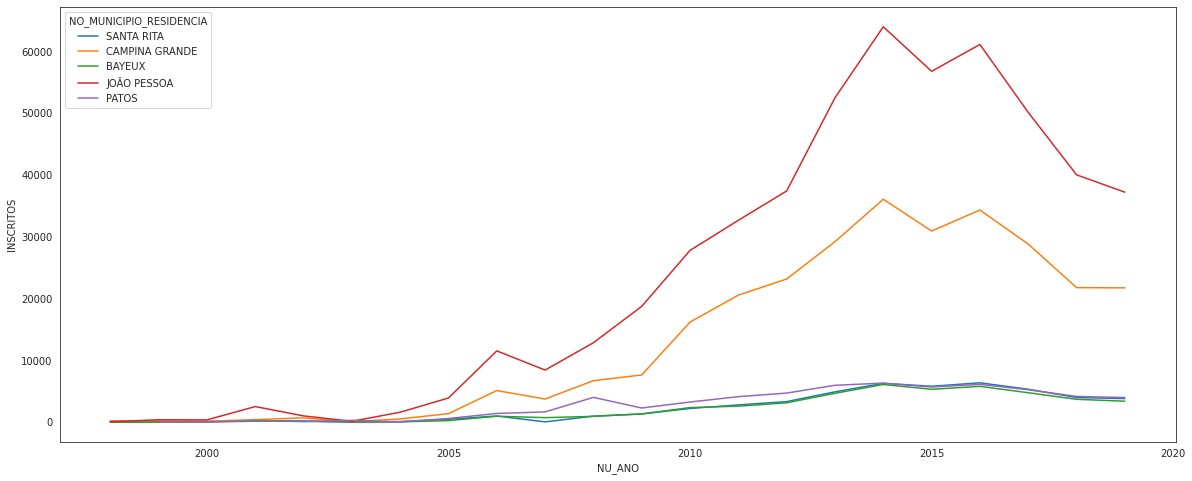

In [59]:
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data=plot_maiores, x="NU_ANO", y="INSCRITOS", hue="NO_MUNICIPIO_RESIDENCIA");

In [61]:
fig = px.line(plot_maiores, x="NU_ANO", y="INSCRITOS", color="NO_MUNICIPIO_RESIDENCIA", title='Mesmo gráfico de cima, mas na biblioteca Plotly')
fig.show()

In [62]:
analise_por_anos = dfEnem.groupby(by=['NU_ANO', 'TP_SEXO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_COR_RACA'])['NU_NOTA_OBJETIVA'].agg(['mean', 'count']).reset_index()
analise_por_anos.rename(columns = {'mean': 'MÉDIA', 'count':'INSCRITOS'}, inplace = True)
analise_por_anos

,NU_ANO,TP_SEXO,TP_DEPENDENCIA_ADM_ESC,TP_COR_RACA,MÉDIA,INSCRITOS
0,2010,F,1.0,0.0,508.566667,3
1,2010,F,1.0,1.0,547.839706,68
2,2010,F,1.0,2.0,528.168182,22
3,2010,F,1.0,3.0,540.293421,76
4,2010,F,1.0,4.0,539.683333,6
...,...,...,...,...,...,...
512,2019,M,4.0,1.0,585.687112,869
513,2019,M,4.0,2.0,542.032787,122
514,2019,M,4.0,3.0,571.530191,838
515,2019,M,4.0,4.0,589.157895,38


In [63]:
analise_por_anos.TP_DEPENDENCIA_ADM_ESC.unique()

array([1., 2., 3., 4.])

In [64]:
########################## ESSE AQUI TÁ BEM BOSTA, VOU MELHORAR #####################################

from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 2,
                    subplot_titles = ('Média NOTA_OBJETIVA', 'Quantidade de Candidat@s',
                                      'Raça', 'DEPENDENCIA_ADM_ESC'))


# Gráfico com a NOTA_OBJETIVA
fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_SEXO'] == 'M']['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_SEXO'] == 'M']['MÉDIA'],
    mode="lines+markers+text",
    name='Nota Homens',
    text = ['{:.2f}'.format(x) for x in analise_por_anos[analise_por_anos['TP_SEXO'] == 'M']['MÉDIA']],
    textposition="top center",
    yaxis='y1'), row = 1, col = 1)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_SEXO'] == 'F']['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_SEXO'] == 'F']['MÉDIA'],  
    mode="lines+markers+text",
    name='Nota Mulheres', 
    text = ['{:.2f}'.format(x) for x in analise_por_anos[analise_por_anos['TP_SEXO'] == 'F']['MÉDIA']],
    textposition="top center",
    yaxis='y1'), row = 1, col = 1)


# Gráfico com a Quantidade de Candidatos
fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_SEXO'] == 'M']['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_SEXO'] == 'M']['INSCRITOS'],  
    mode="lines+markers+text",
    name='Candidatos', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_SEXO'] == 'M']['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 2, col = 1)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_SEXO'] == 'F']['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_SEXO'] == 'F']['INSCRITOS'],  
    mode="lines+markers+text",
    name='Candidatas', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_SEXO'] == 'F']['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 2, col = 1)

# Gráfico com a Quantidade por Raça
# ['Não declarado', 'Branca', 'Preta','Parda','Amarela','Indígena']

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 0]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 0]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Não declarado', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_COR_RACA'] == 0]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 1, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 1]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 1]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Branca', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_COR_RACA'] == 1]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 1, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 2]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 2]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Preta', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_COR_RACA'] == 2]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 1, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 3]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 3]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Parda', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_COR_RACA'] == 3]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 1, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 4]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 4]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Amarela', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_COR_RACA'] == 4]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 1, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 5]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_COR_RACA'] == 5]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Indígena', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_COR_RACA'] == 5]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 1, col = 2)

# Gráfico com a Quantidade por DEPENDENCIA_ADM_ESC
# ['Federal', 'Estadual', 'Municipal','Privada']

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 0]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 0]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Federal', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 0]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 2, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 1]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 1]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Estadual', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 1]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 2, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 2]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 2]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Municipal', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 2]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 2, col = 2)

fig.add_trace(go.Scatter(
    x = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 3]['NU_ANO'],
    y = analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 3]['INSCRITOS'],  
    mode="lines+markers+text",
    name='Privada', 
    text = ['{}'.format(x) for x in analise_por_anos[analise_por_anos['TP_DEPENDENCIA_ADM_ESC'] == 3]['INSCRITOS']],
    textposition="top center",
    yaxis='y2'), row = 2, col = 2)

# fig.update_layout(
#     title_text = 'Evolução - Mulheres vs Homens (Estado da PB)',
#     template = 'plotly_white',
#     autosize = False,
#     width = 700,
#     height = 700,

#     yaxis = dict(
#         visible = False,
#         range = [2350, 2600]
#     ),
#     yaxis2 = dict(
#         visible = False,
#         range = [52000, 125500]
#     ),

#     xaxis = dict(
#         tick0 = 2013,
#         dtick = 3,
#         range = [2012, 2020],
#         title_text = 'Ano'
#     ),
#      xaxis2 = dict(
#         tick0 = 2013,
#         dtick = 3,
#         range = [2012, 2020],
#         title_text = 'Ano'
#     )
# )

fig.show()


In [65]:
# #################### NESSA CÉLULA EU QUERIA FAZER O GRAFICOS DA CÉLULA ACIMA, PORÉM UM POR UM, E USANDO O PLOTLY, MAS AINDA NÃO CONSEGUI

fig = go.Figure(data=go.Scatter(x=plot_maiores.NU_ANO, y=plot_maiores.INSCRITOS, marker_color=plot_maiores.NO_MUNICIPIO_RESIDENCIA))
# px.line(plot_maiores, x="NU_ANO", y="INSCRITOS", color="NO_MUNICIPIO_RESIDENCIA", title='Mesmo gráfico de cima, mas na biblioteca Plotly')
fig.show()

ValueError: ignored

In [28]:
grafico = px.treemap(dfEnem[['NU_NOTA_REDACAO','Escolaridade_Mae']], path=['Escolaridade_Mae'])

ValueError: ignored

#**ANÁLISES POR BOXPLOTS**

## **Relação entre a nota do Enem e o Tipo de Admnistração da Escola (Federal, Estadual, Municipal, Privada)**


In [ ]:
#@title
dfEnem.columns.values

In [ ]:
#@title
vars =['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_COR_RACA',
       'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
       'Escolaridade_Pai', 'Escolaridade_Mae', 'NPessoas', 'Renda',
       'Celular', 'Computador', 'Internet']
dfEnemMELT = pd.melt(dfEnem, id_vars=vars, value_vars=['NU_NOTA_OBJETIVA','NU_NOTA_CN',	
                                                       'NU_NOTA_CH','NU_NOTA_LC',
                                                       'NU_NOTA_MT','NU_NOTA_REDACAO'] )
dfEnemMELT.rename(columns={'value': 'Nota', 'variable':'Prova'}, inplace=True)
dfEnemMELT.head()

In [ ]:
dfEnemMELT.dtypes

In [ ]:
dfEnemMELT.describe()

In [ ]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_DEPENDENCIA_ADM_ESC", y="Nota", 
                col="Prova",col_wrap=2, 
                kind="box",
                height=4, aspect=2, data=dfEnemMELT);

g.fig.suptitle("Notas no Enem por Administração Escolar",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
g.set_xticklabels(['Federal', 'Estadual', 'Municipal','Privada'])
plt.show()

##**Nota por Raça/Cor**
Análise por Boxplot

In [ ]:
#@title
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_COR_RACA", y="Nota", 
                col="Prova",col_wrap=3, 
                data=dfEnemMELT, kind="box",
                height=4, aspect=1.5);
g.fig.suptitle("Notas no Enem por Raça/Cor",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
g.set_xticklabels(['Não declarado', 'Branca', 'Preta','Parda','Amarela','Indígena'], rotation=90)

plt.show()




#**ANÁLISES POR HISTOGRAMAS**

##**Distribuição das Nota do Enem na Paraíba por tipo de escola**

In [ ]:
#@title
dfEnem['TP_ESCOLA'] = dfEnem['TP_ESCOLA'].astype(str)
dfEnem['TP_ESCOLA'] = dfEnem['TP_ESCOLA'].replace({'1': 'Não Informado','2':'Pública','3':'Privada'})
dfEnem['TP_ESCOLA']

In [ ]:
#@title
# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_ESCOLA', 
                x ="NOTA_MEDIA", height=8, aspect=2,bins=200, hue_order=['Privada', 'Pública','Não Informado'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");


Uma grande quantidade de valores nos quais  não foi informado o tipo de Escola

##**Distribuição das Nota do Enem na Paraíba por Localização de escola**

In [ ]:
#@title

dfEnem['TP_LOCALIZACAO_ESC'] = dfEnem['TP_LOCALIZACAO_ESC'].replace({1: 'Urbana',2:'Rural'})

# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_LOCALIZACAO_ESC', 
                x ="NOTA_MEDIA", height=8, aspect=2,bins=200, hue_order=['Rural', 'Urbana'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");

#**ANÁLISES POR SCATTERPLOTS**





##**Gráficos das Relações da Nota Média com  Aspectos Socio-Econômicos**

### *Nota no Enem x Número de Pessoas na Família*

In [ ]:
#@title
g = sns.scatterplot(data=dfEnem, x='Q005', y="NOTA_MEDIA")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");

Há uma dispersão grande no dado de Número de pessoas por família, vamos ver se há uma relação com o tipo de Escola em que Estuda, e a renda

In [ ]:
#@title
g = sns.scatterplot(data=dfEnem, x='Q005', y="NOTA_MEDIA", hue="TP_ESCOLA")
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");

Continua sem dar nenhuma explicação, talvez devido a quantidade de NIs.

In [ ]:
#@title
ordem = ['A','B','C','D','E','F','G','H','I','J','L','K','M','N','O','P','Q']
g = sns.scatterplot(data=dfEnem, x='Q005', y="NOTA_MEDIA", hue="Q006", hue_order=ordem)
g.set(ylabel="Nota no Enem", xlabel="Número de pessoas na família");
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

Um pouco mais claro aqui o resultado.
Converter depois a renda em inteiro (o ponto médio da renda)

#**OUTROS BOXPLOTS**

### *Nota no Enem x Renda Familiar*

In [ ]:
#@title
sns.set_style("white")
ordem = ['A','B','C','D','E','F','G','H','I','J','L','K','M','N','O','P','Q']
sns.set(font_scale=1)
g = sns.catplot(x="Q006", y="NOTA_MEDIA", #hue = dose
                data=dfEnem, kind="box",
                height=4, aspect=1.5,
                order=ordem);

g.fig.suptitle("Notas no Enem por Renda",y=1.1, fontsize=25)
g.set(ylabel="Nota", xlabel="", title="A(Renda mais baixa) --> Q(Renda mais alta)")
plt.show()

##*Escolaridade dos Pais*

In [ ]:
#@title
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 10))

ordem = ['A','B','C','D','E','F','G','H']
sns.set(font_scale=2)

sns.boxplot(ax=ax1,x="Q001", y="NOTA_MEDIA", data=dfEnem, order=ordem);
ax1.set(ylabel="Nota", xlabel="Escolaridade do Pai", title="A(mais baixa) --> H(mais alta)")
#handles, _ = ax1.get_legend_handles_labels()          # Get the artists.
ax1.legend(labels=['A=Não Estudou', 'B=Fund.I completo','C=Fund. II completo',
                           'D=E. Medio Completo', 'E=Graduação Completa','F=Pós-graduação Completa',
                           'G=Não sabe'],bbox_to_anchor=(1.05, 1), borderaxespad=0,fontsize=20)


sns.boxplot(ax=ax2, x="Q001", y="NOTA_MEDIA", data=dfEnem, order=ordem);
ax2.set(ylabel="Nota", xlabel="Escolaridade da Mãe")


plt.show()

Muitos estudandes não sabem a escolaridade dos pais.
Entretanto, pela nota do enem, talvez seja possível estimar que os pais não sejam escolarizados.
Qual a origem dos pais? São de zona rural? qual a profissão?
Aprofundar mais tarde.

## *ACESSO A TECNOLOGIAS*




In [ ]:
#@title
sns.set_style("white")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 10))

sns.set(font_scale=2)

sns.boxplot(ax=ax1,x="Q023", y="NOTA_MEDIA", data=dfEnem);
ax1.set(ylabel="Nota", xlabel="", title="Possui Celular?")
ax1.set_xticks([0,1]) 
ax1.set_xticklabels(['Não', "Sim"], fontsize=20)

#handles, _ = ax1.get_legend_handles_labels()          # Get the artists.
#ax1.legend(labels=['A=Não Estudou', 'B=Fund.I completo','C=Fund. II completo',
 #                          'D=E. Medio Completo', 'E=Graduação Completa','F=Pós-graduação Completa',
 #                          'G=Não sabe'],bbox_to_anchor=(1.05, 1), borderaxespad=0,fontsize=20)

sns.boxplot(ax=ax2,x="Q024", y="NOTA_MEDIA", data=dfEnem);
ax2.set(ylabel="", xlabel="", title="Possui Computador? Quantos?")
ax2.set_xticks([0,1,2,3,4]) 
ax2.set_xticklabels(['Não', '1',"2","3","4"], fontsize=20)


ordem = ['A','B']
sns.boxplot(ax=ax3,x="Q025", y="NOTA_MEDIA", data=dfEnem, order=ordem);
ax3.set(ylabel="", xlabel="", title="Possui internet?")
plt.xticks([0,1], ['Não', 'Sim'])


plt.show()